In [1]:
import os
from rlgym_tools.rocket_league.replays.parsed_replay import ParsedReplay, process_replay
from rlgym_tools.rocket_league.replays.convert import replay_to_rlgym

In [2]:
outdir = "processed/bds-g2"
os.makedirs(outdir, exist_ok=True)

In [3]:
# process_replay("bds-g2.replay", outdir)

In [4]:
replay = ParsedReplay.load("bds-g2.replay")

In [5]:
replay.ball_df

,is_sleeping,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,quat_w,quat_x,quat_y,quat_z,ang_vel_x,ang_vel_y,ang_vel_z,hit_team_num
0,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,0,3448.639893,-902.130005,203.960007,-1233.479980,-1216.239990,-671.359985,-0.097590,0.749216,-0.290719,0.587056,1.606,-1.75,5.5097,1.0
10561,0,3387.020020,-962.880005,169.470001,-1231.560059,-1214.380005,-702.799988,-0.219690,0.751207,-0.203862,0.588103,1.606,-1.75,5.5097,1.0
10562,0,3366.500000,-983.109985,157.630005,-1230.920044,-1213.760010,-713.260010,-0.259429,0.748110,-0.173791,0.585513,1.606,-1.75,5.5097,1.0
10563,0,3305.020020,-1043.739990,121.050003,-1229.000000,-1211.900024,-744.630005,-0.374360,0.727658,-0.081292,0.568999,1.606,-1.75,5.5097,1.0


In [6]:
replay.metadata

{'game': {'id': 'E6080ABC4A13F12C2BBF4A8837E51D04',
  'replay_version': 8,
  'num_frames': 10565,
  'replay_name': 'WORLDS P-I BDS vs G2 G6 2024-09-15.18.21',
  'map_name': 'NeoTokyo_Standard_P',
  'date': '2024-09-15 18-21-19',
  'match_type': 'Lan',
  'team_0_score': 3,
  'team_1_score': 2,
  'goals': [{'frame': 3475, 'player_name': 'dralii', 'is_orange': False},
   {'frame': 3817, 'player_name': 'BeastMode', 'is_orange': True},
   {'frame': 7046, 'player_name': 'dralii', 'is_orange': False},
   {'frame': 7863, 'player_name': 'Daniel', 'is_orange': True},
   {'frame': 9996, 'player_name': 'dralii', 'is_orange': False}]},
 'teams': [{'score': 2, 'is_orange': True}, {'score': 3, 'is_orange': False}],
 'players': [{'unique_id': '289895614930993304',
   'name': 'blastobserver5',
   'online_id': 'f7cb8ded2c8f4d29b0f0dbba914ec1af',
   'online_id_kind': 'Epic',
   'is_orange': None,
   'match_score': 0,
   'match_goals': 0,
   'match_assists': 0,
   'match_saves': 0,
   'match_shots': 0},
 

In [7]:
replay_frames = replay_to_rlgym(replay)

In [8]:
replay_frames_list = list(replay_frames)

In [9]:
replay_frames_list[0].state.cars[11174839928636389730].physics.position

array([ 2047.62, -2559.62,    17.01], dtype=float32)

In [10]:
import pandas as pd
import numpy as np

In [11]:
ball_data = []
for replay_frame in replay_frames_list:
    data = {
        pos: val for pos, val in zip(["x", "y", "z"], replay_frame.state.ball.position)
    }
    velocity = replay_frame.state.ball.linear_velocity
    data["speed"] = np.sqrt(np.dot(velocity, velocity))
    ball_data.append(data)

In [12]:
ball_df = pd.DataFrame(ball_data)
ball_df

,x,y,z,speed
0,0.000000,0.000000,92.750000,0.000000
1,0.000000,0.000000,92.750000,0.000000
2,0.000000,0.000000,92.750000,0.000000
3,0.000000,0.000000,92.750000,0.000000
4,0.000000,0.000000,92.750000,0.000000
...,...,...,...,...
9405,3448.639893,-902.130005,203.960007,1857.804321
9406,3387.020020,-962.880005,169.470001,1866.919067
9407,3366.500000,-983.109985,157.630005,1870.058105
9408,3305.020020,-1043.739990,121.050003,1879.791626


In [13]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from scipy import ndimage
import matplotlib.image as mpimg

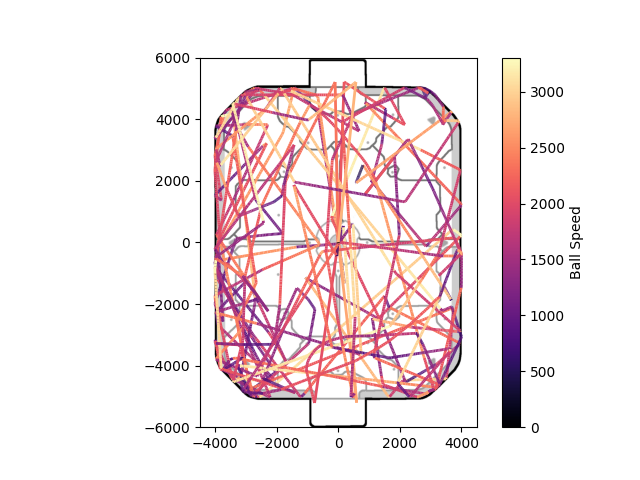

In [14]:
points = np.array([ball_df["x"], ball_df["y"]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[0:-1], points[1:]], axis=1)
norm = plt.Normalize(0.0, ball_df["speed"].max())
lc = LineCollection(segments, cmap="magma", norm=norm)
lc.set_array(ball_df["speed"])
lc.set_linewidth(2)
fig, ax = plt.subplots()
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, label="Ball Speed")
img = mpimg.imread("field.jpeg")
img = ndimage.rotate(img, angle=90)
ax.imshow(img, extent=[-4150,4100,-6250,6200])

ax.set_aspect("equal")
ax.set_xlim(-4500,4500)
ax.set_ylim(-6000,6000)
plt.show()

In [15]:
from rlgym.rocket_league.common_values import (
    BLUE_TEAM,
    ORANGE_TEAM,
    BLUE_GOAL_CENTER,
    ORANGE_GOAL_CENTER,
    GOAL_THRESHOLD,
    GOAL_HEIGHT,
    GOAL_CENTER_TO_POST,
    CEILING_Z
)
import rlgym.rocket_league.math as rlmath

In [16]:
def spherical_coordinates(pos, center):
    rho = rlmath.euclidean_distance(pos, center)
    x, y, z = pos - center
    if x == 0:
        theta = 0
    else:
        theta = np.arctan(y/x)
    
    if rho == 0:
        phi = 0
    else:
        phi = np.arccos(z/rho)
    return rho, theta, phi
    

In [17]:
frame1 = replay_frames_list[0]

In [18]:
replay.player_dfs["11174839928636389730"]

,is_sleeping,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,quat_w,quat_x,quat_y,...,jump_is_active,double_jump_is_active,flip_car_is_active,dodge_is_active,double_jump_torque_x,double_jump_torque_y,double_jump_torque_z,dodge_torque_x,dodge_torque_y,dodge_torque_z
0,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,0.0,4046.310059,-2789.750000,138.149994,-421.339996,-875.090027,-765.979980,-0.314224,-0.464200,0.199444,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0
10561,0.0,4001.000000,-2864.110107,79.949997,-639.890015,-906.340027,-627.890015,-0.348529,-0.329081,0.140149,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0
10562,0.0,4001.000000,-2864.110107,79.949997,-639.890015,-906.340027,-627.890015,-0.348529,-0.329081,0.140149,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0
10563,0.0,3951.909912,-2925.370117,45.169998,-804.000000,-926.739990,-422.420013,-0.367492,-0.214614,0.095825,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0


In [19]:
replay.analyzer["hits"]

[{'frame_number': 178,
  'player_unique_id': '11174839928636389730',
  'player_distance': 255.95503,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 179,
  'player_unique_id': '12114697561242797785',
  'player_distance': 149.99281,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 180,
  'player_unique_id': '11174839928636389730',
  'player_distance': 234.42358,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 208,
  'player_unique_id': '7728916415732163168',
  'player_distance': 373.54138,
  '_debug_info': {'hit_team_num_changed': False,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 210,
  'player_unique_id': '77

In [20]:
ORANGE_GOAL_CENTER

(0, 5120, 321.3875)

In [21]:
spherical_coordinates(frame1.state.ball.position, ORANGE_GOAL_CENTER)

(5125.10244838152, 0, 1.6154224407422195)

In [22]:
def get_ball_features(ball):
    pos = ball.position
    
    

In [23]:
def direction_to_goal(pos, team):
    if team == BLUE_TEAM:
        return rlmath.normalize(BLUE_GOAL_CENTER - pos)
    if team == ORANGE_TEAM:
        return rlmath.normalize(ORANGE_GOAL_CENTER - pos)
    return pos

In [24]:
frame1.state.cars[11174839928636389730].physics.position

array([ 2047.62, -2559.62,    17.01], dtype=float32)

In [25]:
direction_to_goal(frame1.state.cars[11174839928636389730].physics.position, BLUE_TEAM)

array([-0.62189336, -0.77762635,  0.09244408])

In [26]:
direction_to_goal(frame1.state.cars[11174839928636389730].physics.position, ORANGE_TEAM)

array([-0.2574412 ,  0.96553589,  0.03826848])

In [27]:
frame1.state.cars[11174839928636389730].physics.rotation_mtx @ np.array([1,0,0])

array([-0.70706698,  0.70708225, -0.00953837])

In [28]:
np.dot(frame1.state.cars[11174839928636389730].physics.rotation_mtx, [1,0,0])

array([-0.70706698,  0.70708225, -0.00953837])

In [29]:
def plot_field():
    fig, ax = plt.subplots()
    img = mpimg.imread("field.jpeg")
    img = ndimage.rotate(img, angle=90)
    ax.imshow(img, extent=[-4150,4100,-6250,6200])
    return fig, ax

0.8643764356251087
-0.11100728538860388


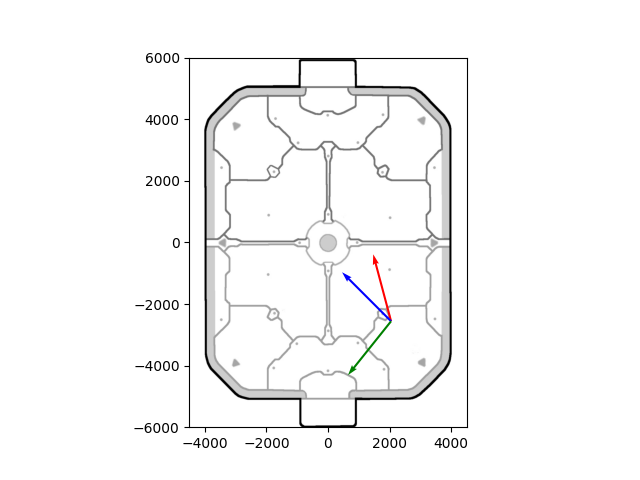

In [30]:
fig, ax = plt.subplots()
img = mpimg.imread("field.jpeg")
img = ndimage.rotate(img, angle=90)
ax.imshow(img, extent=[-4150,4100,-6250,6200])

pos = frame1.state.cars[11174839928636389730].physics.position
rtmx = frame1.state.cars[11174839928636389730].physics.rotation_mtx

dg = direction_to_goal(pos, ORANGE_TEAM)
dp = rtmx @ np.array([1,0,0])
print(dg @ dp)
ax.quiver(pos[0], pos[1], dg[0], dg[1], scale=4, color="r")
ax.quiver(pos[0], pos[1], dp[0], dp[1], scale=4, color="b")

dg = direction_to_goal(pos, BLUE_TEAM)
print(dg @ dp)
ax.quiver(pos[0], pos[1], dg[0], dg[1], scale=4, color="g")

ax.set_aspect("equal")
ax.set_xlim(-4500,4500)
ax.set_ylim(-6000,6000)
plt.show()

In [31]:
def orientation_to_goal(player, team):
    player_direction = np.dot(player.physics.rotation_mtx, [1, 0, 0])
    goal_direction = direction_to_goal(player.physics.position, team)
    return np.dot(goal_direction, player_direction)

In [32]:
orientation_to_goal(frame1.state.cars[11174839928636389730], BLUE_TEAM)

-0.11100728538860388

In [33]:
replay.analyzer["hits"]

[{'frame_number': 178,
  'player_unique_id': '11174839928636389730',
  'player_distance': 255.95503,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 179,
  'player_unique_id': '12114697561242797785',
  'player_distance': 149.99281,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 180,
  'player_unique_id': '11174839928636389730',
  'player_distance': 234.42358,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 208,
  'player_unique_id': '7728916415732163168',
  'player_distance': 373.54138,
  '_debug_info': {'hit_team_num_changed': False,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 210,
  'player_unique_id': '77

In [34]:
replay.analyzer.keys()

dict_keys(['hits', 'stats', 'gameplay_periods'])

In [35]:
from rlgym.rocket_league.sim import RocketSimEngine
from rlgym.api import RLGym

In [36]:
sim = RocketSimEngine()

In [37]:
newstate = frame1.state
newstate.cars = {}

In [38]:
sim.set_state(newstate, {})

GameState(tick_count=10196.097106933594, goal_scored=False, config=GameConfig(gravity=1, boost_consumption=1, dodge_deadzone=0.5), cars={}, ball=PhysicsObject(position=array([ 0.     ,  0.     , 92.74999], dtype=float32), linear_velocity=array([0., 0., 0.], dtype=float32), angular_velocity=array([0., 0., 0.], dtype=float32), _quaternion=None, _rotation_mtx=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32), _euler_angles=None), _inverted_ball=None, boost_pad_timers=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), _inverted_boost_pad_timers=None)

In [39]:
sim.step({},{})

GameState(tick_count=10197.097106933594, goal_scored=False, config=GameConfig(gravity=1, boost_consumption=1, dodge_deadzone=0.5), cars={}, ball=PhysicsObject(position=array([ 0.     ,  0.     , 92.74999], dtype=float32), linear_velocity=array([0., 0., 0.], dtype=float32), angular_velocity=array([0., 0., 0.], dtype=float32), _quaternion=None, _rotation_mtx=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32), _euler_angles=None), _inverted_ball=None, boost_pad_timers=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), _inverted_boost_pad_timers=None)

In [40]:
frame_of_hits = [hit["frame_number"] for hit in replay.analyzer["hits"]]

In [41]:
import copy
from rlgym.rocket_league.api import GameState


def detect_shot(hit: GameState):
    ball_pos = []
    carless_state: GameState = copy.deepcopy(hit)
    carless_state.cars = {}
    sim = RocketSimEngine()
    sim.set_state(carless_state, {})
    for i in range(1000):
        sim.step({}, {})
        ball_pos.append({
            key: val for key, val in zip(["x", "y", "z"], sim.state.ball.position)
        })
        if sim.state.goal_scored:
            print("Goal Scored!")
            break
    return sim.state, pd.DataFrame(ball_pos)

In [42]:
sim_state, ball_df = detect_shot(replay_frames_list[210].state)

Goal Scored!


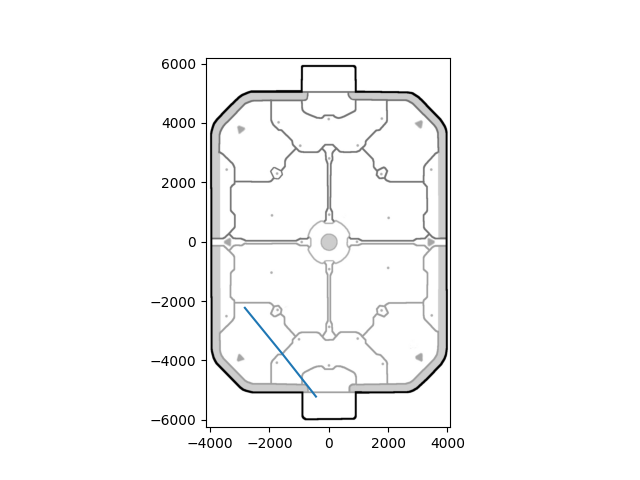

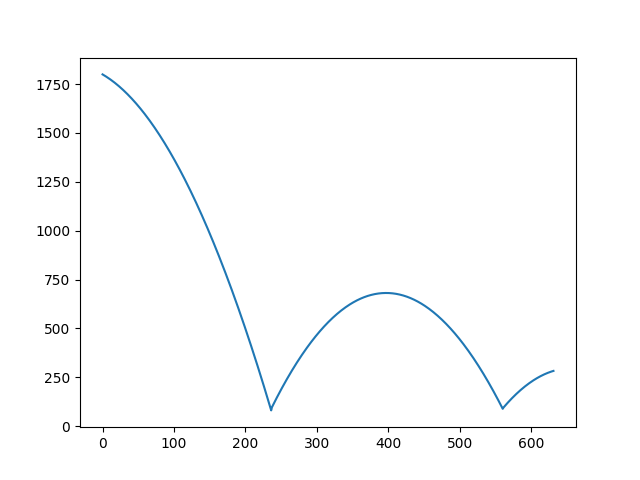

In [43]:
fig, ax = plot_field()
ax.plot(ball_df["x"], ball_df["y"])
plt.show()
fig, ax = plt.subplots()
ax.plot(ball_df["z"])
plt.show()

In [44]:
replay.ball_df

,is_sleeping,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,quat_w,quat_x,quat_y,quat_z,ang_vel_x,ang_vel_y,ang_vel_z,hit_team_num
0,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,0,3448.639893,-902.130005,203.960007,-1233.479980,-1216.239990,-671.359985,-0.097590,0.749216,-0.290719,0.587056,1.606,-1.75,5.5097,1.0
10561,0,3387.020020,-962.880005,169.470001,-1231.560059,-1214.380005,-702.799988,-0.219690,0.751207,-0.203862,0.588103,1.606,-1.75,5.5097,1.0
10562,0,3366.500000,-983.109985,157.630005,-1230.920044,-1213.760010,-713.260010,-0.259429,0.748110,-0.173791,0.585513,1.606,-1.75,5.5097,1.0
10563,0,3305.020020,-1043.739990,121.050003,-1229.000000,-1211.900024,-744.630005,-0.374360,0.727658,-0.081292,0.568999,1.606,-1.75,5.5097,1.0


In [45]:
replay.analyzer["hits"]

[{'frame_number': 178,
  'player_unique_id': '11174839928636389730',
  'player_distance': 255.95503,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 179,
  'player_unique_id': '12114697561242797785',
  'player_distance': 149.99281,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 180,
  'player_unique_id': '11174839928636389730',
  'player_distance': 234.42358,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 208,
  'player_unique_id': '7728916415732163168',
  'player_distance': 373.54138,
  '_debug_info': {'hit_team_num_changed': False,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 210,
  'player_unique_id': '77

In [46]:
sim_state

GameState(tick_count=11669.508850097656, goal_scored=True, config=GameConfig(gravity=1, boost_consumption=1, dodge_deadzone=0.5), cars={}, ball=PhysicsObject(position=array([ -430.30472, -5218.3003 ,   282.8806 ], dtype=float32), linear_velocity=array([ 349.64066, -444.18015,  132.7124 ], dtype=float32), angular_velocity=array([4.385309 , 3.4519382, 2.202994 ], dtype=float32), _quaternion=None, _rotation_mtx=array([[ 0.98044217, -0.1762102 ,  0.08765333],
       [ 0.05399127, -0.18746822, -0.9807857 ],
       [ 0.18925667,  0.9663362 , -0.17428793]], dtype=float32), _euler_angles=None), _inverted_ball=None, boost_pad_timers=array([0.        , 0.        , 0.        , 4.583416  , 0.        ,
       2.9999866 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.93330777, 0.        , 0.        ,
       6.8667145 , 0.        , 0.        , 7.4750385 , 2.3999786 ,
       0.        , 0.        , 3.4000835 , 0.        , 0.        ,
       0.        , 0.        , 0.

In [47]:
replay_frames_list[210]

ReplayFrame(state=GameState(tick_count=11037.508850097656, goal_scored=False, config=GameConfig(gravity=1, boost_consumption=1, dodge_deadzone=0.5), cars={11174839928636389730: Car(team_num=0, hitbox_type=0, ball_touches=0, bump_victim_id=None, demo_respawn_timer=0.0, wheels_with_contact=(True, True, True, True), supersonic_time=0.0, boost_amount=23.92156982421875, boost_active_time=0.0, handbrake=0.0, is_jumping=False, has_jumped=False, is_holding_jump=False, jump_time=0.10000000149011612, has_flipped=False, has_double_jumped=False, air_time_since_jump=0, flip_time=0, flip_torque=array([-0.8354088,  0.5496291,  0.       ], dtype=float32), is_autoflipping=False, autoflip_timer=0.0, autoflip_direction=0.0, physics=PhysicsObject(position=array([   55.528336, -3956.7139  ,    17.018799], dtype=float32), linear_velocity=array([ 2.8278183e+02, -9.7140369e+02,  2.3319498e-01], dtype=float32), angular_velocity=array([ 2.5543189e-03,  1.4249235e-04, -1.8901882e+00], dtype=float32), _quaternion

In [48]:
replay_frames_list[211]

ReplayFrame(state=GameState(tick_count=11041.520690917969, goal_scored=False, config=GameConfig(gravity=1, boost_consumption=1, dodge_deadzone=0.5), cars={11174839928636389730: Car(team_num=0, hitbox_type=0, ball_touches=0, bump_victim_id=None, demo_respawn_timer=0.0, wheels_with_contact=(True, True, True, True), supersonic_time=0.0, boost_amount=23.92156982421875, boost_active_time=0.0, handbrake=0.0, is_jumping=False, has_jumped=False, is_holding_jump=False, jump_time=0.10000000149011612, has_flipped=False, has_double_jumped=False, air_time_since_jump=0, flip_time=0, flip_torque=array([-0.8354088,  0.5496291,  0.       ], dtype=float32), is_autoflipping=False, autoflip_timer=0.0, autoflip_direction=0.0, physics=PhysicsObject(position=array([   61.6 , -3985.16,    17.01], dtype=float32), linear_velocity=array([ 1.7271e+02, -8.3734e+02,  3.1000e-01], dtype=float32), angular_velocity=array([ 1.0000e-03, -1.0000e-04, -1.8123e+00], dtype=float32), _quaternion=array([ 0.75799984,  0.003223

In [49]:
replay.player_dfs['11174839928636389730']

,is_sleeping,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,quat_w,quat_x,quat_y,...,jump_is_active,double_jump_is_active,flip_car_is_active,dodge_is_active,double_jump_torque_x,double_jump_torque_y,double_jump_torque_z,dodge_torque_x,dodge_torque_y,dodge_torque_z
0,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,2048.000000,-2560.000000,17.010000,0.000000,0.000000,0.270000,0.382684,-0.004410,0.001815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,0.0,4046.310059,-2789.750000,138.149994,-421.339996,-875.090027,-765.979980,-0.314224,-0.464200,0.199444,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0
10561,0.0,4001.000000,-2864.110107,79.949997,-639.890015,-906.340027,-627.890015,-0.348529,-0.329081,0.140149,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0
10562,0.0,4001.000000,-2864.110107,79.949997,-639.890015,-906.340027,-627.890015,-0.348529,-0.329081,0.140149,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0
10563,0.0,3951.909912,-2925.370117,45.169998,-804.000000,-926.739990,-422.420013,-0.367492,-0.214614,0.095825,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-2.47,0.7,0.0


In [50]:
replay.analyzer["hits"]

[{'frame_number': 178,
  'player_unique_id': '11174839928636389730',
  'player_distance': 255.95503,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 179,
  'player_unique_id': '12114697561242797785',
  'player_distance': 149.99281,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 180,
  'player_unique_id': '11174839928636389730',
  'player_distance': 234.42358,
  '_debug_info': {'hit_team_num_changed': True,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 208,
  'player_unique_id': '7728916415732163168',
  'player_distance': 373.54138,
  '_debug_info': {'hit_team_num_changed': False,
   'ang_vel_changed': True,
   'predicted_bounce': False,
   'speed_increased': False}},
 {'frame_number': 210,
  'player_unique_id': '77

In [51]:
replay.ball_df.iloc[208:211, :]

,is_sleeping,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,quat_w,quat_x,quat_y,quat_z,ang_vel_x,ang_vel_y,ang_vel_z,hit_team_num
208,0,-1260.489990,-141.009995,93.330002,-1145.109985,-79.370003,27.77000,-0.341273,-0.213395,0.599615,0.691706,-0.0818,-4.9510,-1.2690,0.0
209,0,-1298.640015,-143.649994,93.809998,-1143.949951,-79.290001,6.07000,-0.276298,-0.256499,0.631018,0.678000,-0.0818,-4.9510,-1.2690,0.0
210,0,-1358.050049,-150.130005,99.339996,-2567.879883,-441.839996,330.51001,-0.255663,-0.287568,0.636521,0.668418,0.4910,0.3776,2.1124,0.0


In [52]:
import RocketSim as rsim

In [53]:
arena = rsim.Arena(rsim.GameMode.SOCCAR)

In [54]:
replay.ball_df

,is_sleeping,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,quat_w,quat_x,quat_y,quat_z,ang_vel_x,ang_vel_y,ang_vel_z,hit_team_num
0,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.000000,0.000000,92.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,0,3448.639893,-902.130005,203.960007,-1233.479980,-1216.239990,-671.359985,-0.097590,0.749216,-0.290719,0.587056,1.606,-1.75,5.5097,1.0
10561,0,3387.020020,-962.880005,169.470001,-1231.560059,-1214.380005,-702.799988,-0.219690,0.751207,-0.203862,0.588103,1.606,-1.75,5.5097,1.0
10562,0,3366.500000,-983.109985,157.630005,-1230.920044,-1213.760010,-713.260010,-0.259429,0.748110,-0.173791,0.585513,1.606,-1.75,5.5097,1.0
10563,0,3305.020020,-1043.739990,121.050003,-1229.000000,-1211.900024,-744.630005,-0.374360,0.727658,-0.081292,0.568999,1.606,-1.75,5.5097,1.0


In [55]:
ball_pos = replay.ball_df.iloc[180, :][["pos_x", "pos_y", "pos_z"]].to_numpy()
ball_vel = replay.ball_df.iloc[180, :][["vel_x", "vel_y", "vel_z"]].to_numpy()
ball_ang_vel = replay.ball_df.iloc[180, :][["ang_vel_x", "ang_vel_y", "ang_vel_z"]].to_numpy()
ball_quat = replay.ball_df.iloc[180, :][["quat_w", "quat_x", "quat_y", "quat_z"]].to_numpy()

In [56]:
ball_state = rsim.BallState()
ball_state.pos = rsim.Vec(*ball_pos)
ball_state.vel = rsim.Vec(*ball_vel)
ball_state.ang_vel = rsim.Vec(*ball_ang_vel)
try:
    ball_state.rot_mat = rsim.RotMat(*rlmath.quat_to_rot_mtx(ball_quat).transpose().flatten())
except ValueError:
    pass

In [57]:
arena.ball.set_state(ball_state)

In [58]:
arena.step(100)

In [59]:
arena.ball.get_state()

In [60]:
arena.ball.get_state().pos

(-1143.3258056640625, -132.82705688476562, 95.44061279296875)

In [61]:
arena.stop()

In [85]:
def simulate_ball(ball_data, ticks=100, callback=None):
    team = ball_data["hit_team_num"]
    arena = rsim.Arena(rsim.GameMode.SOCCAR)
    ball_pos = ball_data[["pos_x", "pos_y", "pos_z"]].to_numpy()
    ball_vel = ball_data[["vel_x", "vel_y", "vel_z"]].to_numpy()
    ball_ang_vel = ball_data[["ang_vel_x", "ang_vel_y", "ang_vel_z"]].to_numpy()
    ball_quat = ball_data[["quat_w", "quat_x", "quat_y", "quat_z"]].to_numpy()
    ball_state = rsim.BallState()
    ball_state.pos = rsim.Vec(*ball_pos)
    ball_state.vel = rsim.Vec(*ball_vel)
    ball_state.ang_vel = rsim.Vec(*ball_ang_vel)
    try:
        ball_state.rot_mat = rsim.RotMat(*rlmath.quat_to_rot_mtx(ball_quat).transpose().flatten())
    except ValueError:
        pass
    arena.ball.set_state(ball_state)
    ball_sim_data = []
    for i in range(ticks):
        arena.step(1)
        next_state = arena.ball.get_state()
        current_ball_state = {
            key: val for key, val in zip(["x", "y", "z"], next_state.pos)
        }
        ball_sim_data.append(current_ball_state)
        if callback:
            if callback(current_ball_state, team, i):
                break
    arena.stop()
    return pd.DataFrame(ball_sim_data)

In [86]:
def test_callback(state, team , iter):
    print(state)
    if iter > 10:
        return True

In [84]:
replay.ball_df.iloc[934, :]

is_sleeping        0.000000
pos_x           -624.369995
pos_y           4062.939941
pos_z           1511.170044
vel_x            248.889999
vel_y          -1587.560059
vel_z            376.709991
quat_w             0.446904
quat_x             0.577906
quat_y             0.642064
quat_z             0.232498
ang_vel_x          2.740400
ang_vel_y         -0.122900
ang_vel_z          0.045900
hit_team_num       1.000000
Name: 934, dtype: float64

In [92]:
ball_data = replay.ball_df.iloc[934, :]
sim_df = simulate_ball(ball_data, ticks=2000)

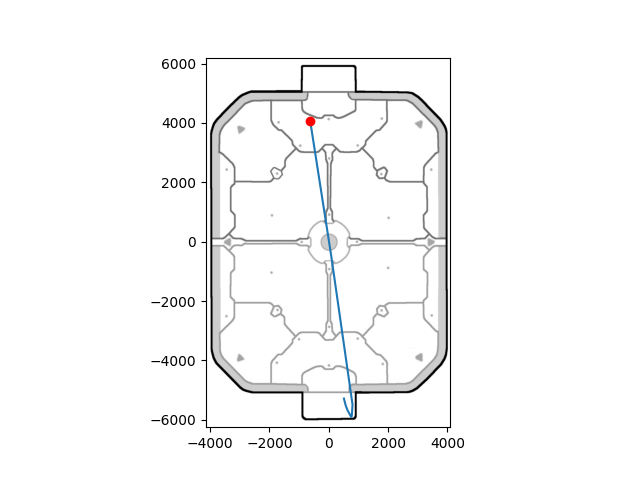

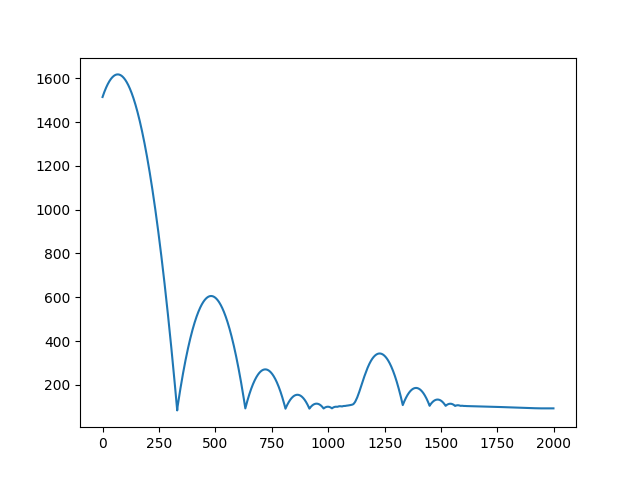

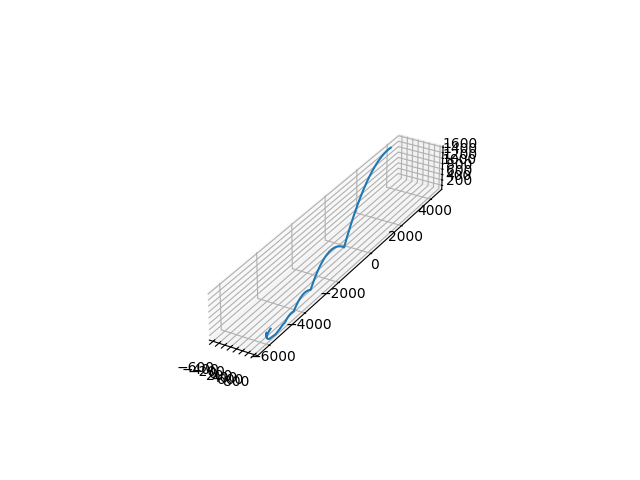

In [93]:
fig, ax = plot_field()
ax.scatter(ball_data["pos_x"], ball_data["pos_y"], color="r")
ax.plot(sim_df["x"], sim_df["y"], zorder=0)
plt.show()
fig, ax = plt.subplots()
ax.plot(sim_df["z"])
plt.show()
ax = plt.figure().add_subplot(projection='3d')
ax.plot(sim_df["x"], sim_df["y"], sim_df["z"], zorder=0)
ax.set_aspect("equal")
plt.show()

In [66]:
def _rectangle_sdf(x, y, halfsize):
    halfsize = np.array(halfsize)
    edge_distance = np.abs([x, y]) - halfsize
    return np.sum(rlmath.magnitude(np.maximum(edge_distance, 0)))
vec_rectangle_sdf = np.vectorize(_rectangle_sdf)
vec_rectangle_sdf.excluded.add(2)

In [67]:
def rectangle_sdf(pos, halfsize):
    halfsize = np.array(halfsize)
    edge_distance = np.abs(pos) - halfsize
    return np.sum(rlmath.magnitude(np.maximum(edge_distance, 0)))

In [68]:
def distance_to_goal(pos, team):
    if team:
        goal_pos = ORANGE_GOAL_CENTER
        y_offset = GOAL_THRESHOLD
    else:
        goal_pos = BLUE_GOAL_CENTER
        y_offset = -GOAL_THRESHOLD
    
    offset = np.array(goal_pos)
    offset[1] += y_offset
    halfsize = [
        GOAL_CENTER_TO_POST,
        GOAL_THRESHOLD,
        GOAL_HEIGHT / 2
    ]
    
    return rectangle_sdf(pos - offset, halfsize)

C:\Users\Violet\AppData\Local\Temp\ipykernel_22404\734061518.py:10: UserWarning: The following kwargs were not used by contour: 'shading'
  ax.contour(X, Y, Z, 20, shading='auto', cmap='viridis')


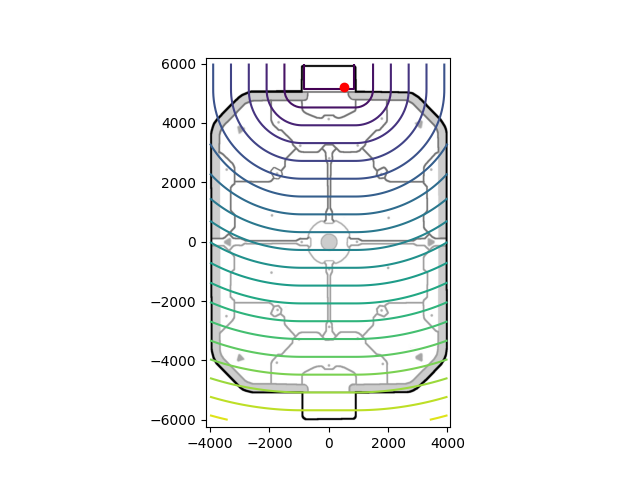

In [101]:
x = np.linspace(-4000, 4000, 100)
y = np.linspace(-6000, 6000, 100)
z = np.linspace(0, CEILING_Z, 100)
halfsize = [GOAL_CENTER_TO_POST, GOAL_THRESHOLD, GOAL_HEIGHT/2]
offset = np.array(ORANGE_GOAL_CENTER)
offset[1] += GOAL_THRESHOLD
X, Y = np.meshgrid(x, y)
Z = vec_rectangle_sdf(X - offset[0], Y - offset[1], halfsize[0:2])
fig, ax = plot_field()
ax.contour(X, Y, Z, 20, shading='auto', cmap='viridis')
test_pos = np.array([500, 5200, 300])
ax.scatter(test_pos[0], test_pos[1], color="r", zorder=10)

In [102]:
distance_to_goal(test_pos, ORANGE_TEAM)

0.0

In [72]:
replay.ball_df.iloc[210, :]

is_sleeping        0.000000
pos_x          -1358.050049
pos_y           -150.130005
pos_z             99.339996
vel_x          -2567.879883
vel_y           -441.839996
vel_z            330.510010
quat_w            -0.255663
quat_x            -0.287568
quat_y             0.636521
quat_z             0.668418
ang_vel_x          0.491000
ang_vel_y          0.377600
ang_vel_z          2.112400
hit_team_num       0.000000
Name: 210, dtype: float64

In [113]:
def detect_shot_callback(state, team, iter, threshold=200):
    ball_pos = [state["x"], state["y"], state["z"]]
    dist = distance_to_goal(ball_pos, not team)
    # print(f"Distance to goal: {dist}")
    if dist == 0.0:
        print(f"Goal!")
        return True
    if dist < threshold:
        print(f"Shot Detected!")
    return

In [117]:
ball_data = replay.ball_df.iloc[934, :]
sim_df = simulate_ball(ball_data, ticks=2000, callback=detect_shot_callback)

Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Shot Detected!
Goal!


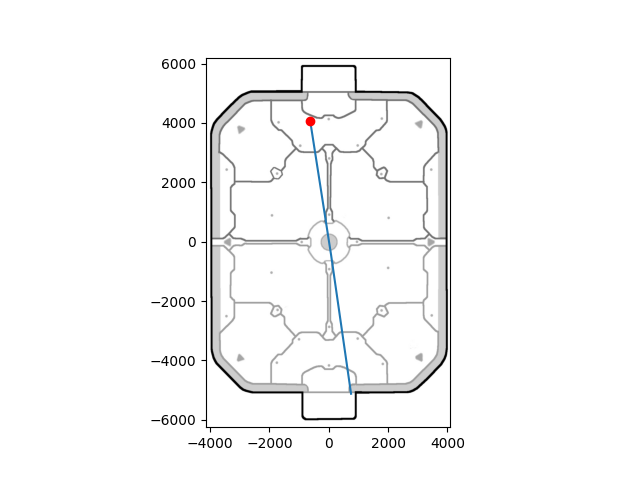

In [118]:
fig, ax = plot_field()
ax.scatter(ball_data["pos_x"], ball_data["pos_y"], color="r")
ax.plot(sim_df["x"], sim_df["y"], zorder=0)
plt.show()